케라스 데이터셋 로이터 데이터의 일반적 딥러닝테스트 (더 깊게 테스트) ReuterDeep1.ipynb 에서 ReuterDeep2.ipynb ReuterDeep50.ipynb

In [23]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=1500, test_split=0.5)

len(train_data), len(test_data)

#train_data[5]

(5614, 5614)

In [24]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[5]])
print(decoded_newswire)

? the u s agriculture department estimated ? 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 ? grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3


In [25]:
import numpy as np

def vectorize_sequences(sequences, dimension=1500):
	results=np.zeros((len(sequences), dimension))
	for i, sequence in enumerate(sequences):
		results[i, sequence]=1.
	return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
	results=np.zeros((len(labels), dimension))
	for i, label in enumerate(labels):
		results[i, label] =1.
	return results

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [26]:
# 히든층이 4개인 경우 과적합 확인 학습은 빨리 진행되고 학습데이터에 대해서는 적합하나 테스트 데이터에 대해서는 성능이 오히려 나빠진다.

from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1500,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
44/44 [==============================] - 1s 13ms/step - loss: 2.7428 - accuracy: 0.4011 - val_loss: 1.7909 - val_accuracy: 0.5385
Epoch 2/20
44/44 [==============================] - 0s 7ms/step - loss: 1.6111 - accuracy: 0.6133 - val_loss: 1.4938 - val_accuracy: 0.6587
Epoch 3/20
44/44 [==============================] - 0s 7ms/step - loss: 1.3194 - accuracy: 0.7007 - val_loss: 1.3480 - val_accuracy: 0.6854
Epoch 4/20
44/44 [==============================] - 0s 7ms/step - loss: 1.1121 - accuracy: 0.7316 - val_loss: 1.2670 - val_accuracy: 0.6986
Epoch 5/20
44/44 [==============================] - 0s 7ms/step - loss: 0.9557 - accuracy: 0.7659 - val_loss: 1.2174 - val_accuracy: 0.7098
Epoch 6/20
44/44 [==============================] - 0s 7ms/step - loss: 0.8019 - accuracy: 0.8023 - val_loss: 1.2096 - val_accuracy: 0.7209
Epoch 7/20
44/44 [==============================] - 0s 7ms/step - loss: 0.6754 - accuracy: 0.8318 - val_loss: 1.2321 - val_accuracy: 0.7294
Epoch 8/20
44/44 [=

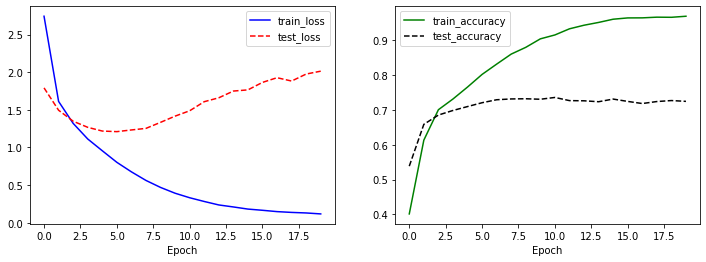

In [27]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [28]:
# 히든층이 3개인 경우 과적합 확인 학습은 빨리 진행되고 학습데이터에 대해서는 적합하나 테스트 데이터에 대해서는 성능이 오히려 나빠진다.

from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1500,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
44/44 [==============================] - 1s 12ms/step - loss: 2.9060 - accuracy: 0.3814 - val_loss: 1.8514 - val_accuracy: 0.5645
Epoch 2/20
44/44 [==============================] - 0s 6ms/step - loss: 1.5958 - accuracy: 0.6224 - val_loss: 1.4534 - val_accuracy: 0.6690
Epoch 3/20
44/44 [==============================] - 0s 6ms/step - loss: 1.2616 - accuracy: 0.7129 - val_loss: 1.2796 - val_accuracy: 0.7032
Epoch 4/20
44/44 [==============================] - 0s 6ms/step - loss: 1.0311 - accuracy: 0.7597 - val_loss: 1.1944 - val_accuracy: 0.7337
Epoch 5/20
44/44 [==============================] - 0s 6ms/step - loss: 0.8444 - accuracy: 0.7973 - val_loss: 1.1534 - val_accuracy: 0.7414
Epoch 6/20
44/44 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.8320 - val_loss: 1.1268 - val_accuracy: 0.7503
Epoch 7/20
44/44 [==============================] - 0s 6ms/step - loss: 0.5530 - accuracy: 0.8630 - val_loss: 1.1602 - val_accuracy: 0.7512
Epoch 8/20
44/44 [=

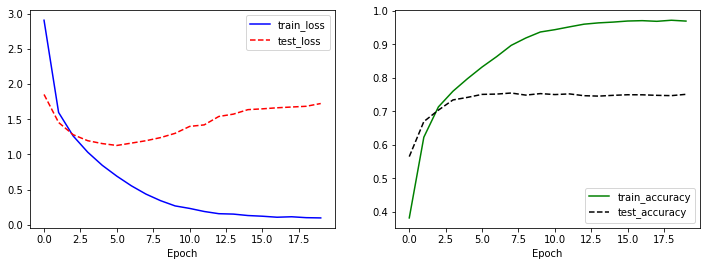

In [29]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [30]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1500,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
44/44 [==============================] - 1s 11ms/step - loss: 2.5870 - accuracy: 0.4510 - val_loss: 1.6666 - val_accuracy: 0.6240
Epoch 2/20
44/44 [==============================] - 0s 6ms/step - loss: 1.4561 - accuracy: 0.6712 - val_loss: 1.3695 - val_accuracy: 0.6929
Epoch 3/20
44/44 [==============================] - 0s 6ms/step - loss: 1.1720 - accuracy: 0.7285 - val_loss: 1.2228 - val_accuracy: 0.7182
Epoch 4/20
44/44 [==============================] - 0s 6ms/step - loss: 0.9573 - accuracy: 0.7725 - val_loss: 1.1303 - val_accuracy: 0.7423
Epoch 5/20
44/44 [==============================] - 0s 6ms/step - loss: 0.7702 - accuracy: 0.8160 - val_loss: 1.0824 - val_accuracy: 0.7520
Epoch 6/20
44/44 [==============================] - 0s 6ms/step - loss: 0.6200 - accuracy: 0.8509 - val_loss: 1.0513 - val_accuracy: 0.7651
Epoch 7/20
44/44 [==============================] - 0s 6ms/step - loss: 0.5028 - accuracy: 0.8771 - val_loss: 1.0573 - val_accuracy: 0.7659
Epoch 8/20
44/44 [=

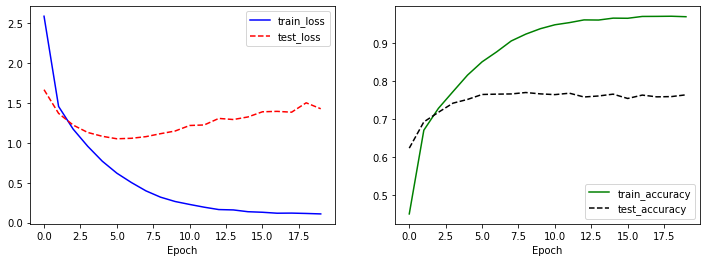

In [31]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [32]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1500,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
44/44 [==============================] - 1s 10ms/step - loss: 2.8070 - accuracy: 0.3618 - val_loss: 1.7438 - val_accuracy: 0.5987
Epoch 2/20
44/44 [==============================] - 0s 6ms/step - loss: 1.4326 - accuracy: 0.6740 - val_loss: 1.2854 - val_accuracy: 0.7111
Epoch 3/20
44/44 [==============================] - 0s 6ms/step - loss: 1.0790 - accuracy: 0.7601 - val_loss: 1.1227 - val_accuracy: 0.7501
Epoch 4/20
44/44 [==============================] - 0s 6ms/step - loss: 0.8536 - accuracy: 0.8162 - val_loss: 1.0285 - val_accuracy: 0.7722
Epoch 5/20
44/44 [==============================] - 0s 6ms/step - loss: 0.6789 - accuracy: 0.8488 - val_loss: 0.9753 - val_accuracy: 0.7795
Epoch 6/20
44/44 [==============================] - 0s 6ms/step - loss: 0.5456 - accuracy: 0.8769 - val_loss: 0.9643 - val_accuracy: 0.7757
Epoch 7/20
44/44 [==============================] - 0s 6ms/step - loss: 0.4325 - accuracy: 0.9058 - val_loss: 0.9427 - val_accuracy: 0.7855
Epoch 8/20
44/44 [=

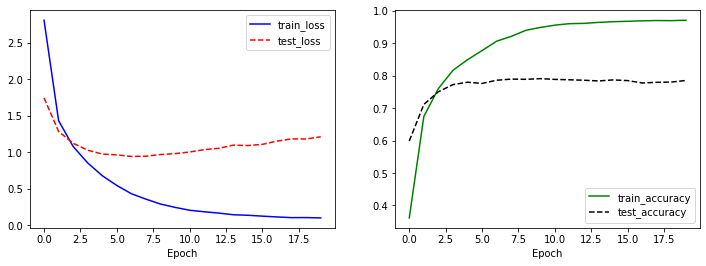

In [33]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()